In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("crime_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
features=data.iloc[:,1:]

In [6]:
features

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
data.shape

(50, 5)

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])

In [16]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Hierarchical Clustering

In [18]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


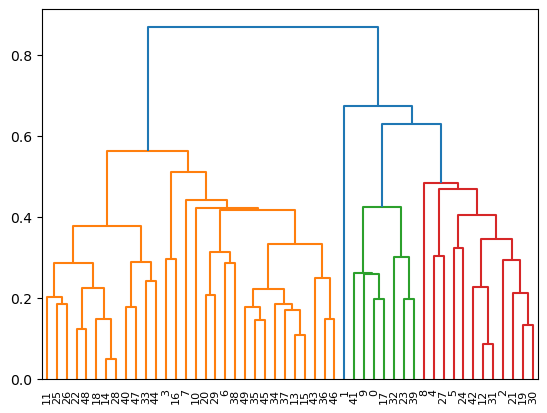

In [23]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [60]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

In [61]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [62]:
y_hc

array([0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [63]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [64]:
df_norm['h_clusterid'] = Clusters

In [65]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,2
4,0.493976,0.791096,1.000000,0.860465,0


In [66]:
data['h_clusterid'] = Clusters

In [67]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [68]:
data.sort_values("h_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [69]:
df1 = data.drop(['Unnamed: 0'],axis=1)
df_clust = df1.groupby('h_clusterid').mean()
df_clust

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,12.278947,254.842105,69.473684,28.357895
1,10.000000,263.000000,48.000000,44.500000
2,4.870000,114.433333,63.633333,15.943333


In [72]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
y_hc2 = hc.fit_predict(df_norm)

Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])
data['h_clusterid'] = Clusters
df2 = data.drop(['Unnamed: 0'],axis=1)
df_clust2 = df2.groupby('h_clusterid').mean()
df_clust2


,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714


# KMEANS

In [73]:
from sklearn.cluster import KMeans 

In [74]:
crime_data = pd.read_csv("crime_data.csv")

In [83]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [109]:
features=crime_data.iloc[:,1:]
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)
scaled_features

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.56203089,
         0.85572968],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.36640231,
        -1.85329372],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.36640231,
         0.68881335],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  1.56203089,
        -1.72493917],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.36640231,
         0.76566024],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.36640231,
        -0.21525935],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.59781429,
        -0.83039152],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.59781429,
        -0.40276019],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.36640231,
        -0.69302543],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.56203089,
         0.18136682],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [110]:
model=KMeans(n_clusters=4)
model.fit_predict(scaled_features)

array([0, 3, 3, 0, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       1, 0, 3, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 2])

In [111]:
model.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669,  1.56203089,
         0.21127262],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842, -1.33061891,
         0.26399588],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024,  0.59781429,
         0.02962772],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383, -0.36640231,
        -0.43047469]])

In [112]:
nc=range(1,11)
l=[]
for i in nc:
    model=KMeans(n_clusters=i)
    model.fit(scaled_features)
    l.append(model.inertia_)
    

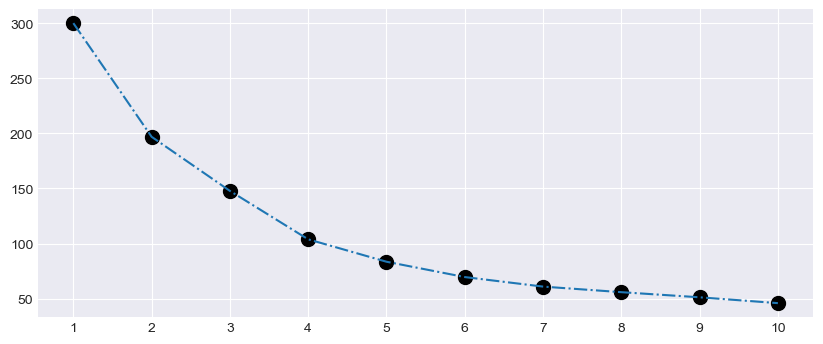

In [113]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

In [114]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_features)
labels = k_means.labels_

In [115]:
crime_data["Clus_kmeans"] = labels
crime_data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clus_kmeans,sil_width
0,Alabama,13.2,236,58,21.2,3,0.461597
1,Alaska,10.0,263,48,44.5,2,0.060537
2,Arizona,8.1,294,80,31.0,2,0.436886
3,Arkansas,8.8,190,50,19.5,3,0.079539
4,California,9.0,276,91,40.6,2,0.448262


In [116]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [117]:
silhouette_score(scaled_features,labels)

0.37915206031437393

In [118]:
sil_width = silhouette_samples(scaled_features,labels)
crime_data["sil_width"] = sil_width
crime_data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clus_kmeans,sil_width
0,Alabama,13.2,236,58,21.2,3,0.458592
1,Alaska,10.0,263,48,44.5,2,0.204951
2,Arizona,8.1,294,80,31.0,2,0.285409
3,Arkansas,8.8,190,50,19.5,3,0.011868
4,California,9.0,276,91,40.6,2,0.340188


In [119]:
df_1 = crime_data.drop(['Unnamed: 0','sil_width'],axis=1)
df_kmeans = df_1.groupby('Clus_kmeans').mean()
df_kmeans

,Murder,Assault,UrbanPop,Rape
Clus_kmeans,,,,
0,5.656250,138.875000,73.875000,18.781250
1,3.600000,78.538462,52.076923,12.176923
2,10.815385,257.384615,76.000000,33.192308
3,13.937500,243.625000,53.750000,21.412500


# DBSCAN

In [120]:
from sklearn.cluster import DBSCAN

In [128]:
crime_data2 = pd.read_csv("crime_data.csv")

In [129]:
df=crime_data2.iloc[:,1:]

In [123]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [130]:
array = df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [131]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [132]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [176]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [177]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [178]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [179]:
cl

,Cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [180]:
pd.concat([crime_data2,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [ ]:
# The 2nd record is Noicy